## copy the make_mockobs_filaments script, but use the psf_conv image

In [71]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u
from astropy.io import fits

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'mask_galaxies.ipynb'
%run 'extract_filament.ipynb'

#from LoadData import loaddata

In [72]:
def thismakemap(data,size,ax,colmap='viridis',xystarts = [0.,0.],title = '',colorbar=True,mockobs=False,labelaxes=True,label='',Vmin = None, Vmax = None):
    fontsize=13
    #xystarts = [0.,0.] # lower left origin of the plot
    
    if mockobs:
        clabel = r'log signal (photons)'
    else:
        clabel = r'log photons/cm$^2$/s/sr'
    
    if type(size) == float or type(size) == int:
        print('The type of size is '+str(type(size)))
        xsize = size
        ysize = size
    else:
        print('The type of size is '+str(type(size)))
        xsize = size[0]
        ysize = size[1]
    
    if labelaxes:
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        #ax.xaxis.set_label_position('top') 
        ax.xaxis.set_label_position('bottom') 
        #ax.xaxis.tick_top()
        #ax.minorticks_on()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    
    colmap = 'viridis' #'afmhot'
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    
    # nearest neighbour interpolation does not do any averaging, it just picks the nearest point and uses that as the value for a specific section in the image
    img = ax.imshow(data.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower', 
                    cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
    
    #plt.title(label,fontsize=fontsize)
    div = axgrid.make_axes_locatable(ax)
        
    if colorbar:
        #cax = div.append_axes("right",size="5%",pad=0.1)
        
        # bottom color bar:
        #cax = div.append_axes("bottom",size="15%",pad=0.1)
        #cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        
        # top color bar:
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')

        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.xaxis.set_label_position('top')      
        cbar.ax.xaxis.set_ticks_position('top')
        cbar.solids.set_edgecolor("face")
        #cbar.ax.set_ylabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

load the data

In [8]:
machine = 'coho'
plotchecks = True
slicewidth=5.
distance='50Mpc'
resolution=None

In [9]:
data_tuple_5 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 50Mpc is 13.0357429643.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,13.0357429643 appended.


### cutout section of the array that contains the filament

In [39]:
xystarts = [40.,0.]
size     = [20.,20.]
data_cutout = data_tuple_5[0]
data_cutout = data_cutout[(40./100.*32000):(60./100.*32000),0:(20./100.*32000)]

data_smallcutout = data_tuple_5[0]; xystarts_sm = [45.,9.5]; size_sm=[5.,5.]
data_smallcutout = data_smallcutout[(xystarts_sm[0]/100.*32000):((xystarts_sm[0]+size_sm[0])/100.*32000),(xystarts_sm[1]/100.*32000):((xystarts_sm[1]+size_sm[1])/100.*32000)]
data_smallcutout.shape

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  after removing the cwd from sys.path.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  import sys


(1600, 1600)

### mask the galaxies


13.0357429643


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


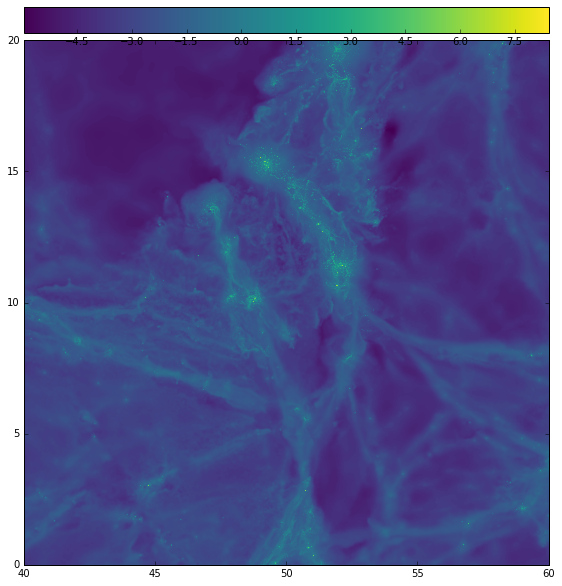

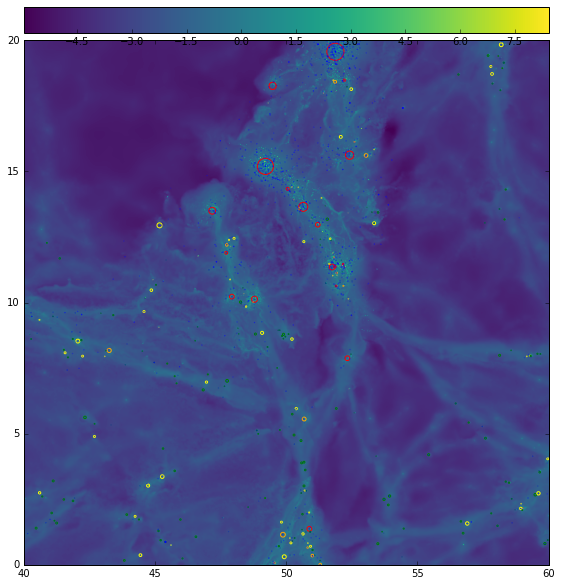

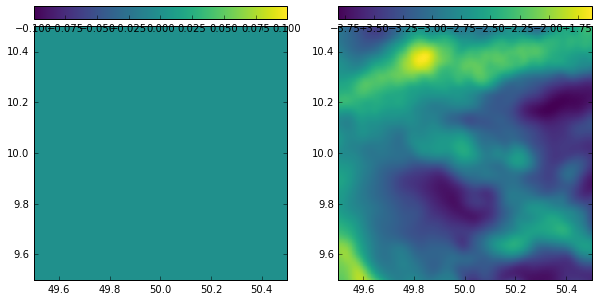

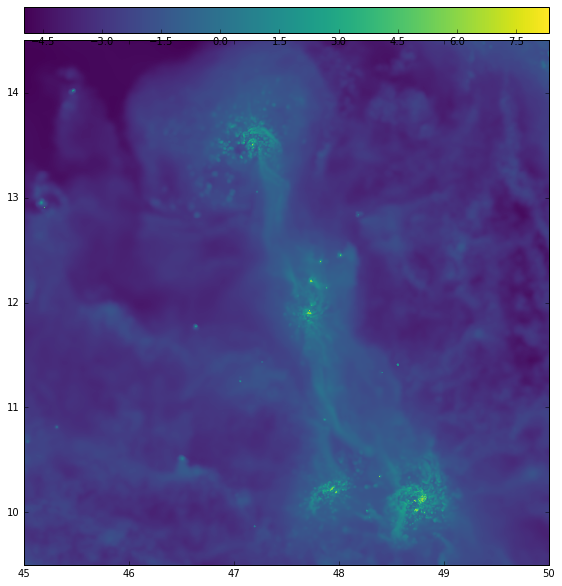

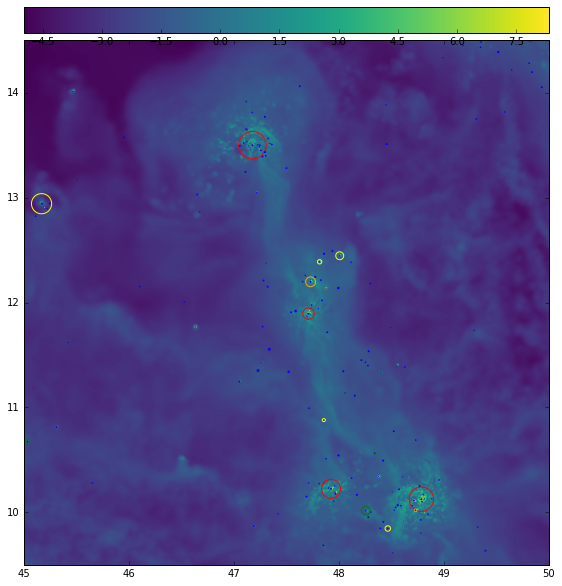

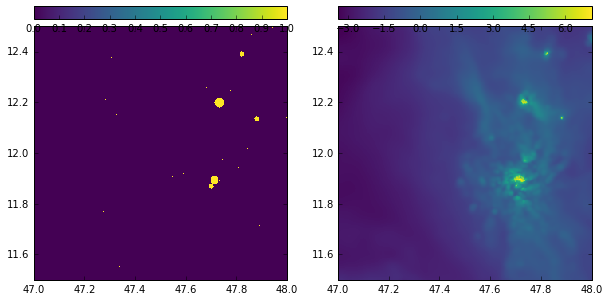

In [40]:
resolution = data_tuple_5[3]
print resolution
masked_data = maskgalaxies(data_cutout,xystarts,size,slicewidth,distance,resolution,debug=False,verbose=False)
masked_data_sm = maskgalaxies(data_smallcutout,xystarts_sm,size_sm,slicewidth,distance,resolution,debug=False,verbose=False)

### convolve the filament with a psf

In [67]:
%run 'psf_image_conv.ipynb'

STARTING convolution...
img shape: (1600,1600), boxlength: 5.0 Mpc,numpix: 1600,z: 0.0115,kernel: 2MoffatAureole,fwhm: 1.45444104333e-05 arcsec. 

af: 0.02,mf: 0.98, m1f: 0.8,beta1: 7.0,beta2: 2.0,d0: 50.0
 Generating the 2Moffat or 2MoffatAureole kernel...

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
DEBUGGING: comoving distance (cm): 1.56557514321e+26
DEBUGGING: longlen (the boxlength in cm): 1.542839e+25
DEBUGGING: adist (comoving distance divided by cosmological factor): 1.5477757224e+26
DEBUGGING: image angle per pixel (arcsec): 12.7043441397


//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:2000: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  res = empty((N,)+dimensions, dtype=dtype)
//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:2003: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  tmp.shape = (1,)*i + (dim,)+(1,)*(N-i-1)
//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:2005: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  val = zeros(newdim, dtype)


 Calculting PSF.

DEBUGGING: Integral of kernel (not normalized yet): 26360305073.8
Reducing psf by factor of 10.0 

DEBUGGING: Integral of kernel (normalized): 1.0
 Fourier transforming PSF.



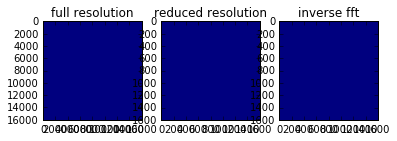

 FINISHED generate_abr_fftkernel.

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 2.0...
DEBUGGING: comoving distance (cm): 1.56557514321e+26
DEBUGGING: longlen (the boxlength in cm): 1.542839e+25
DEBUGGING: adist (comoving distance divided by cosmological factor): 1.5477757224e+26
DEBUGGING: image angle per pixel (arcsec): 12.7043441397
 Calculting PSF.

DEBUGGING: Integral of kernel (not normalized yet): 26364681136.3
Reducing psf by factor of 10.0 

DEBUGGING: Integral of kernel (normalized): 1.0
 Fourier transforming PSF.



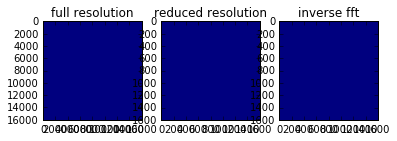

 FINISHED generate_abr_fftkernel.



/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:422: RuntimeWarning: invalid value encountered in log10


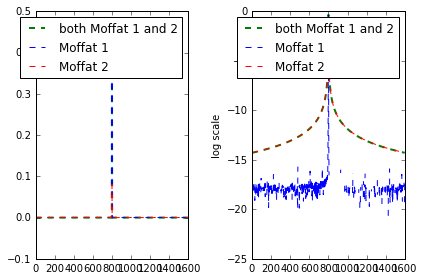

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
DEBUGGING: comoving distance (cm): 1.56557514321e+26
DEBUGGING: longlen (the boxlength in cm): 1.542839e+25
DEBUGGING: adist (comoving distance divided by cosmological factor): 1.5477757224e+26
DEBUGGING: image angle per pixel (arcsec): 12.7043441397
 Calculting PSF.

Reducing psf by factor of 10.0 

DEBUGGING: Integral of kernel (not normalized yet): 256598046.665
DEBUGGING: Integral of kernel (normalized): 1.0
 Fourier transforming PSF.



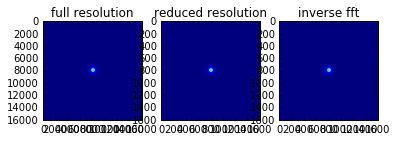

 FINISHED generate_abr_fftkernel.


The sum of flux before the convolution is: 1.08168e+09
The sum of flux after the convolution is: 1081676691.62

FINISHED convolution.


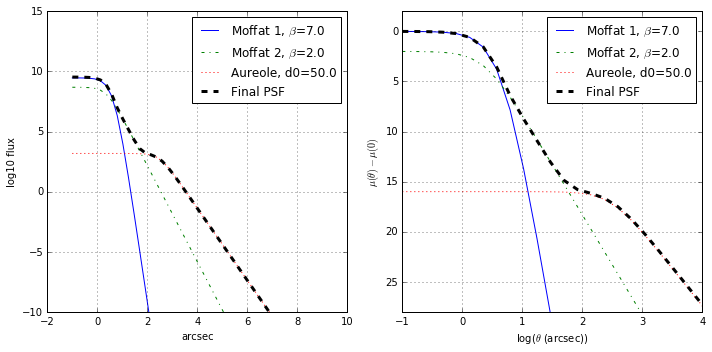

In [46]:
fwhm = 3.0*arcsec
boxlength = size_sm[0]
numpix = data_smallcutout.shape[0]
z = 0.0115 # distance = '50Mpc'
data_cutout_psfconv = conv_image_abr(10**data_smallcutout,boxlength,numpix,z,'2MoffatAureole',fwhm,debug=True,plotchecks=True)

The type of size is <type 'list'>
The type of size is <type 'list'>
The type of size is <type 'list'>
The type of size is <type 'list'>
1600.0 pixels across, 13.0 arcsec per pixel --> 20800.0 arcsec across = 5.77777777778 degrees across


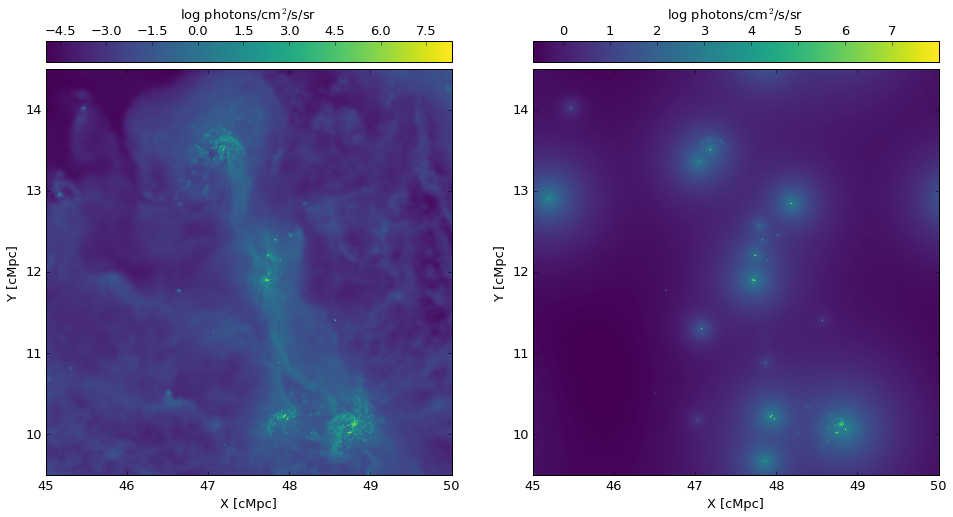

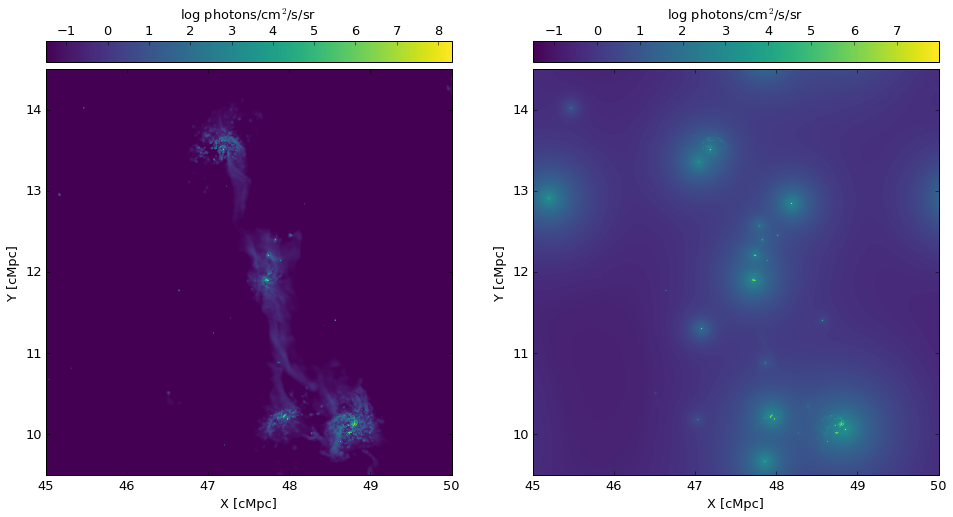

In [73]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16., 16.))
vmin = None; vmax = None
thismakemap(data_smallcutout,size_sm,ax1,xystarts=xystarts_sm,Vmin=vmin,Vmax=vmax)
thismakemap(np.log10(np.fft.fftshift(data_cutout_psfconv)),size_sm,ax2,xystarts=xystarts_sm,Vmin=vmin,Vmax=vmax)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16., 16.))
vmin = -1.5; vmax = None
thismakemap(data_smallcutout,size_sm,ax1,xystarts=xystarts_sm,Vmin=vmin,Vmax=vmax)
thismakemap(np.log10(np.fft.fftshift(data_cutout_psfconv)),size_sm,ax2,xystarts=xystarts_sm,Vmin=vmin,Vmax=vmax)

print "%s pixels across, %s arcsec per pixel --> %s arcsec across = %s degrees across"%(1600.,13.,1600.*13.,1600.*13./3600.)

### extract the filament (both data, the psf-convolved data and mask)

small cutout is supplied - will extract filament from the cutout.
The type of size is <type 'float'>
Region 1: [  928.   544.   768.  1152.] , [  320.  1440.  1440.   320.]
xacross_length,yacross_length,xdown_length,ydown_length:  223, 0, -383, 1120
xacross_length > yacross_length:
iterable: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

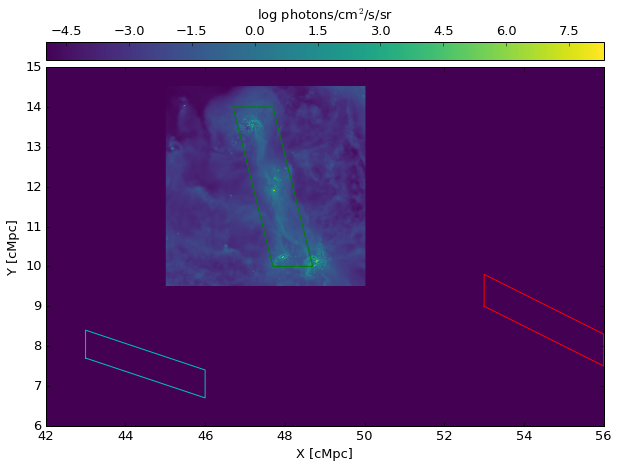

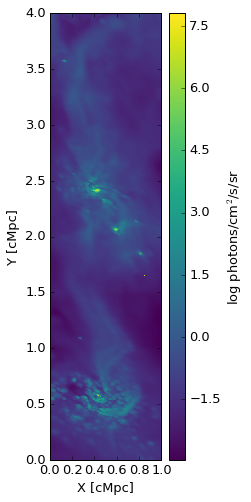

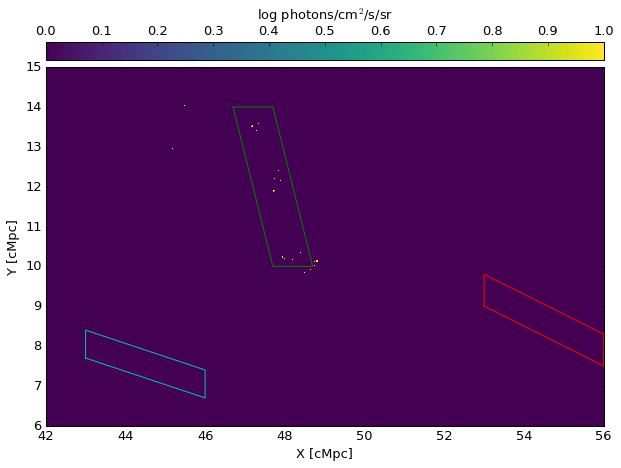

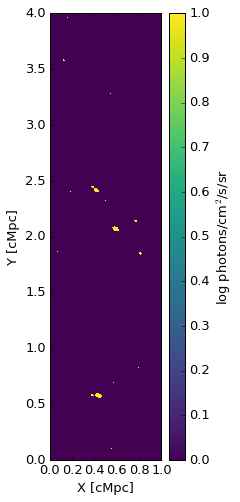

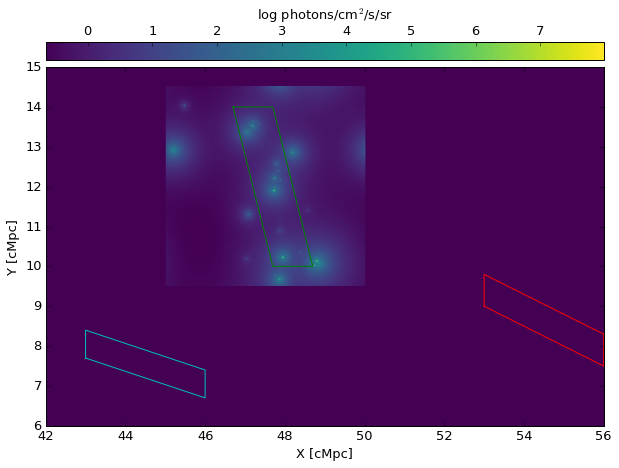

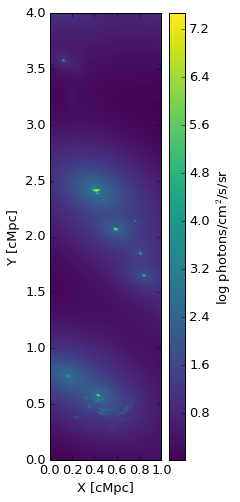

In [78]:
%run 'extract_filament.ipynb'

SBdata_filament = extractfilament(smallcutout=masked_data_sm.data,plotchecks=True,size=size_sm[0],xystarts=xystarts_sm)
mask_filament = extractfilament(smallcutout=masked_data_sm.mask,plotchecks=True,size=size_sm[0],xystarts=xystarts_sm)
SBdata_psfconv_filament = extractfilament(smallcutout=np.log10(np.fft.fftshift(data_cutout_psfconv)),plotchecks=True,size=size_sm[0],xystarts=xystarts_sm)


In [56]:
xystarts_filament=[0.,0.]
size_filament=[1.,4.]

In [62]:
%run 'extract_filament.ipynb'

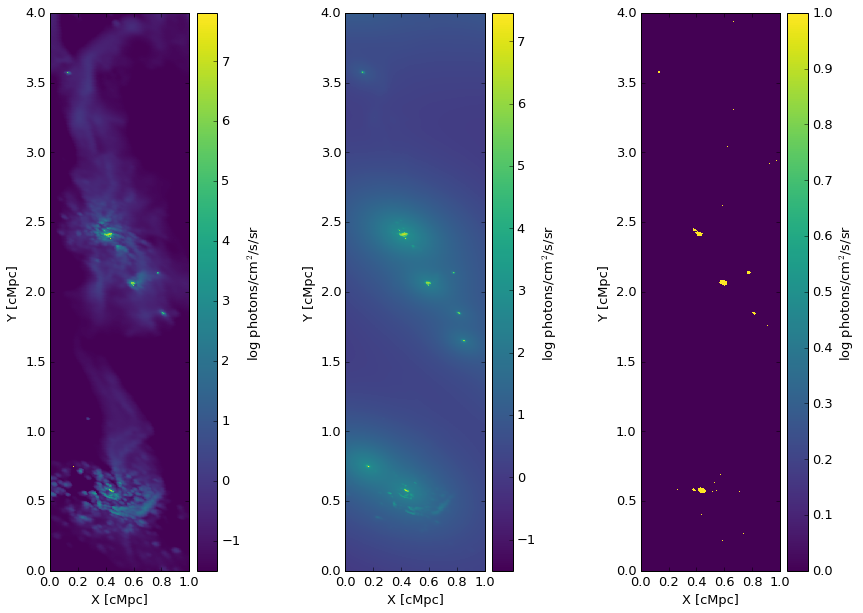

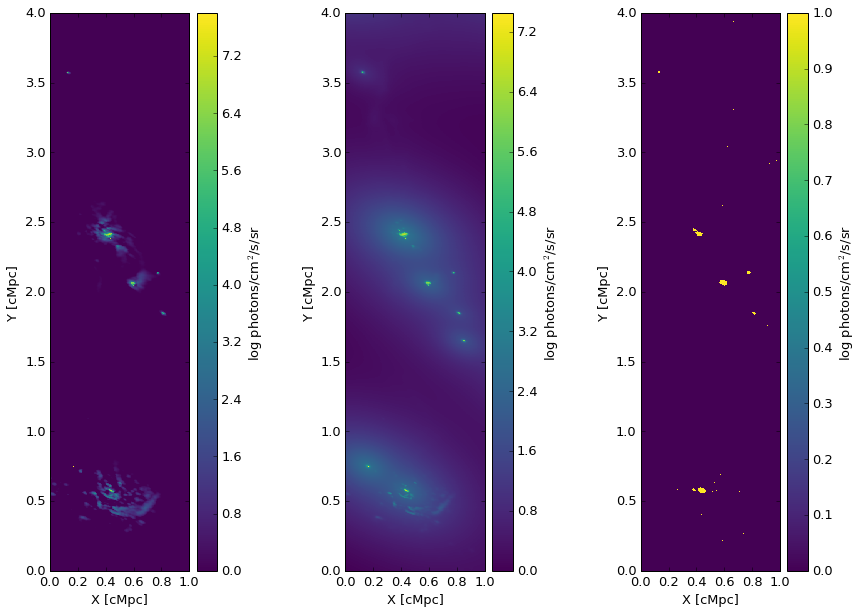

In [80]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15., 10.))
vmin = -1.5; vmax = None
plotfilament(SBdata_filament,ax1,Vmin = vmin,Vmax= vmax)
plotfilament(SBdata_psfconv_filament,ax2,Vmin = vmin,Vmax= vmax)
plotfilament(mask_filament,ax3)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15., 10.))
vmin = 0; vmax = None
plotfilament(SBdata_filament,ax1,Vmin = vmin,Vmax= vmax)
plotfilament(SBdata_psfconv_filament,ax2,Vmin = vmin,Vmax= vmax)
plotfilament(mask_filament,ax3)